In [1]:
import pandas as pd
from geopy.distance import geodesic

In [4]:
complete = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_VMS_COMPLETE.csv', sep=";")

complete.dropna().head()

/tmp/ipykernel_170213/529539037.py:1: DtypeWarning: Columns (7,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  complete = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_VMS_COMPLETE.csv', sep=";")


,Starttidspunkt,Fartøyidentifikasjon,Source,CatchLat,CatchLon,Startposisjon bredde,Startposisjon lengde,Stopptidspunkt,Stopposisjon bredde,Stopposisjon lengde,Rundvekt,Method,Location,Date,distance_km,elapsed_time_hours,speed
791015,2011-09-01 04:00:00,FYRHOLM - LKIB - H 0010B,ERS,60.269,3.469,60.122,3.238,2011-09-01 19:00:00,60.269,3.469,2000.0,stop,"(60.269, 3.469)",2011-09-01,20.794978,15.000000,1.386332
791016,2011-09-01 04:00:00,FYRHOLM - LKIB - H 0010B,ERS,60.122,3.238,60.122,3.238,2011-09-01 19:00:00,60.269,3.469,2000.0,start,"(60.122, 3.238)",2011-09-01,20.794978,15.000000,1.386332
791017,2011-09-01 04:13:00,AMBASSADOR - LJBI - R 0126K,ERS,60.770,2.434,60.520,2.150,2011-09-01 19:41:00,60.770,2.434,10000.0,stop,"(60.77, 2.434)",2011-09-01,31.896104,15.466667,2.062248
791018,2011-09-01 04:13:00,AMBASSADOR - LJBI - R 0126K,ERS,60.520,2.150,60.520,2.150,2011-09-01 19:41:00,60.770,2.434,10000.0,start,"(60.52, 2.15)",2011-09-01,31.896104,15.466667,2.062248
791019,2011-09-01 04:27:00,SHEIK - LLSO - VA0055S,ERS,60.855,2.031,60.368,2.080,2011-09-01 19:45:00,60.855,2.031,8000.0,stop,"(60.855, 2.031)",2011-09-01,54.329126,15.300000,3.550923


In [ ]:
complete['Starttidspunkt'] = pd.to_datetime(complete['Starttidspunkt'], format='%Y-%m-%d %H:%M:%S')
complete['Date'] = pd.to_datetime(complete['Date'], format='%Y-%m-%d')

# populate all Date values == na with Starttidspunkt values
complete['Date'] = complete['Date'].fillna(complete['Starttidspunkt'].dt.date)
complete.head()

# remove duplicated catch locations for each date
complete = complete.drop_duplicates(subset=['Date', 'CatchLat', 'CatchLon'])
complete.describe()

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Starttidspunkt,CatchLat,CatchLon,Startposisjon bredde,Startposisjon lengde,Stopposisjon bredde,Stopposisjon lengde,Rundvekt,Date,distance_km,elapsed_time_hours,speed
count,167090,167090.000000,167090.000000,35150.000000,35150.000000,35150.000000,35150.000000,3.515000e+04,167090,35150.000000,35150.000000,3.510500e+04
mean,2021-02-19 04:40:16.017499648,62.039057,1.993900,61.940982,1.605042,61.961021,1.640858,1.323548e+05,2021-02-18 16:08:42.602190336,9.554197,2.950776,inf
min,2011-07-31 06:41:00,57.563200,-3.133000,54.751000,-10.000000,0.422000,-5.000000,1.000000e+00,2011-07-31 00:00:00,0.000000,0.000000,0.000000e+00
25%,2018-10-17 15:00:30,60.099000,0.555000,60.006000,0.026000,60.016000,0.033000,2.500000e+04,2018-10-17 00:00:00,1.056721,1.483333,6.372057e-01
50%,2022-09-24 19:59:30,62.600000,1.977300,62.304000,1.550000,62.333000,1.567000,8.000000e+04,2022-09-24 00:00:00,2.132947,2.083333,1.176784e+00
75%,2023-11-02 06:09:30,63.820100,3.300000,63.795750,2.817000,63.814000,2.833000,1.850000e+05,2023-11-02 00:00:00,6.290538,3.166667,2.405506e+00
max,2024-11-22 02:14:00,72.231300,66.928700,68.233000,85.748000,89.133000,85.715000,3.200000e+06,2024-11-22 00:00:00,6876.631761,43.800000,inf
std,NaN,1.990663,1.885542,2.049915,1.973313,2.087142,1.977518,1.501115e+05,NaN,61.595771,2.781428,NaN


In [18]:
# find unique dates in complete
unique_dates = complete['Date'].unique()
print(f"Unique dates in complete: {len(unique_dates)}")
complete[complete['Source']== 'ERS'].head()

Unique dates in complete: 1170


,Starttidspunkt,Fartøyidentifikasjon,Source,CatchLat,CatchLon,Startposisjon bredde,Startposisjon lengde,Stopptidspunkt,Stopposisjon bredde,Stopposisjon lengde,Rundvekt,Method,Location,Date,distance_km,elapsed_time_hours,speed
791015,2011-09-01 04:00:00,FYRHOLM - LKIB - H 0010B,ERS,60.269,3.469,60.122,3.238,2011-09-01 19:00:00,60.269,3.469,2000.0,stop,"(60.269, 3.469)",2011-09-01,20.794978,15.000000,1.386332
791016,2011-09-01 04:00:00,FYRHOLM - LKIB - H 0010B,ERS,60.122,3.238,60.122,3.238,2011-09-01 19:00:00,60.269,3.469,2000.0,start,"(60.122, 3.238)",2011-09-01,20.794978,15.000000,1.386332
791017,2011-09-01 04:13:00,AMBASSADOR - LJBI - R 0126K,ERS,60.770,2.434,60.520,2.150,2011-09-01 19:41:00,60.770,2.434,10000.0,stop,"(60.77, 2.434)",2011-09-01,31.896104,15.466667,2.062248
791018,2011-09-01 04:13:00,AMBASSADOR - LJBI - R 0126K,ERS,60.520,2.150,60.520,2.150,2011-09-01 19:41:00,60.770,2.434,10000.0,start,"(60.52, 2.15)",2011-09-01,31.896104,15.466667,2.062248
791019,2011-09-01 04:27:00,SHEIK - LLSO - VA0055S,ERS,60.855,2.031,60.368,2.080,2011-09-01 19:45:00,60.855,2.031,8000.0,stop,"(60.855, 2.031)",2011-09-01,54.329126,15.300000,3.550923


In [ ]:

path = "/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS.csv"
df_original = pd.read_csv(path, sep=";")
print(df_original.columns)


df_original_start = df_original[df_original['Method'] == 'start']

# Filter out Rundvekt == 0
df = df_original_start[df_original_start['Rundvekt'] != 0]
print(f"Number of rows with Rundvekt == 0: {df_original_start.shape[0] - df.shape[0]}")

# df = df1[df1['Method'] == 'stop']



# compute distance between start and stop coordinates in km
def compute_distance(row):
    start_coords = (row['Startposisjon bredde'], row['Startposisjon lengde'])
    stop_coords = (row['Stopposisjon bredde'], row['Stopposisjon lengde'])
    return geodesic(start_coords, stop_coords).km

test= {
    "SW": {"lat": 57.666668, "lon": -3.166667},
    "SE": {"lat": 57.666668, "lon":  7.5},
    "NE": {"lat": 68.25, "lon":  7.5},
    "NW": {"lat": 68.25, "lon": -3.166667}
}

# remove any catches that are not in the test area
df = df[(df['CatchLat'] >= test['SW']['lat']) & 
        (df['CatchLat'] <= test['NE']['lat']) &
        (df['CatchLon'] >= test['SW']['lon']) & 
        (df['CatchLon'] <= test['SE']['lon'])]

Index(['Starttidspunkt', 'Startposisjon bredde', 'Startposisjon lengde',
       'Stopptidspunkt', 'Stopposisjon bredde', 'Stopposisjon lengde',
       'Rundvekt', 'Fartøyidentifikasjon', 'CatchLat', 'CatchLon', 'Method',
       'Location', 'Date'],
      dtype='object')
Number of rows with Rundvekt == 0: 47


In [2]:
df['distance_km'] = df.apply(compute_distance, axis=1)

df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed', dayfirst=True)
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed', dayfirst=True)

# get elapsed time in hours
df['elapsed_time_hours'] = (df['Stopptidspunkt'] - df['Starttidspunkt']).dt.total_seconds() / 3600

In [3]:
df["speed"] = df['distance_km'] / df['elapsed_time_hours']

# filter out rows with speed over 20 km/h if distance_km < 1 km
# this is to avoid removing unrealistic speeds for short distances

df_filtered = df[~((df['distance_km'] < 1) & (df['speed'] > 20))]
# df.to_csv("TEST_MAC_ERS_filtered.csv", sep=';', index=False)

print(f'Removed {df.shape[0] - df_filtered.shape[0]} rows with unrealistic speeds')



Removed 30 rows with unrealistic speeds


### filtered catch instances per year

In [4]:
# print catches per year
df_show = df[df['Method'] == 'start']
df_show['year'] = df_show['Starttidspunkt'].dt.year
print(df_show['year'].value_counts())

year
2022    3543
2024    3131
2021    2739
2023    2435
2014    1465
2011    1315
2020    1214
2012    1162
2018    1108
2013    1080
2016    1019
2015     967
2017     958
2019     846
Name: count, dtype: int64


/tmp/ipykernel_1460371/3025833788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['year'] = df_show['Starttidspunkt'].dt.year


In [5]:
# find unique dates with catches given per year
df_show['date'] = df_show['Starttidspunkt'].dt.date
unique_dates = df_show.groupby('year')['date'].nunique().reset_index()
print("Unique dates with catches per year:")
print(unique_dates)

Unique dates with catches per year:
    year  date
0   2011    65
1   2012    68
2   2013    75
3   2014    83
4   2015    89
5   2016    81
6   2017    82
7   2018    66
8   2019    51
9   2020    58
10  2021   110
11  2022   120
12  2023    96
13  2024   105


/tmp/ipykernel_1460371/389521436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['date'] = df_show['Starttidspunkt'].dt.date


### Combine the VMS data

In [1]:
from utilities import find_vms_records
from pathlib import Path
import pandas as pd



ERS_PATH = '/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_filtered.csv'
df_ers = pd.read_csv(ERS_PATH, sep=';')
df_ers['Source'] = 'ERS'
df_ers_start = df_ers[df_ers['Method'] == 'start']

all_mac_ERS_VMS = df_ers_start.copy()

for year in range(2011, 2025):
    VMS_PATH = f'/home/anna/msc_oppgave/fish-forecast/VMS-plots/filtered_vms_ALL-MAC_{year}.csv'
    df_vms = pd.read_csv(VMS_PATH, sep=';', low_memory=False)
    df_vms['Source'] = 'VMS'

    df_vms['Fartøyidentifikasjon'] = (df_vms['Fartøynavn'].astype(str) + " - " + 
                                      df_vms['Radiokallesignal'].astype(str) + " - " + 
                                      df_vms['Registreringsmerke'].astype(str))
    df_vms = find_vms_records(df_ers_start, df_vms, year)
    df_vms.to_csv(f"check-imgs/filtered_vms_test-MAC_{year}.csv", sep=';', index=False)
    all_mac_ERS_VMS = pd.concat([all_mac_ERS_VMS, df_vms], ignore_index=True)
# add stop location back to the dataframe
df_ers_stop = df_ers[df_ers['Method'] == 'stop']

all_mac_ERS_VMS = pd.concat([all_mac_ERS_VMS, df_ers_stop], ignore_index=True)


all_mac_ERS_VMS.to_csv("TEST_MAC_ERS_VMS.csv", sep=';', index=False)


/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Number of VMS records: 9634
VMS date: 2011-07-31 07:35:00 -> 2011-12-05 05:50:00
Number of VMS records after initial time-filter:  9182


Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:44<00:00, 11.19it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 9336
497 unique vessels
167 unique vessels
Missing VMS vessels: {'BØMMELBAS - LLGZ - H 0175B', 'BOGASUND - JXVP - H 0021S', 'NESEBUEN - LCFH - VA0086LS', 'SILDASKJÆR - LMMF - SF0001V', 'MOSTEIN - LGBG - H 0221B', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'VESTBAS - LHRX - M 0116HØ', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'MALENE S - LMWR - H 0077AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'HERØYHAV - LDFB - M 0250HØ', 'JOHAN BERG - LLWT - N 0145VR', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER -

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:39<00:00, 12.46it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 8005
497 unique vessels
167 unique vessels
Missing VMS vessels: {'BØMMELBAS - LLGZ - H 0175B', 'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'VESTBAS - LHRX - M 0116HØ', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'MALENE S - LMWR - H 0077AV', 'HAVFISK - LLGA - M 0200A', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'HERØYHAV - LDFB - M 0250HØ', 'JOHAN BERG - LLWT - N 0145VR', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LA

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:37<00:00, 13.13it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 7699
497 unique vessels
163 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'MALENE S - LMWR - H 0077AV', 'HAVFISK - LLGA - M 0200A', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'HERØYHAV - LDFB - M 0250HØ', 'JOHAN BERG - LLWT - N 0145VR', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'ÅKERØY - LDHM

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:45<00:00, 10.84it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 10818
497 unique vessels
164 unique vessels
Missing VMS vessels: {'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'JOHAN BERG - LLWT - N 0145VR', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER 

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:34<00:00, 14.50it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 6373
497 unique vessels
159 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'SKULBAREN - JWLH - T 0111T', 'INGVARDSON - LEIA - H 0095K', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LI

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:37<00:00, 13.41it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 13762
497 unique vessels
164 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'ARNØYFJORD - LLGB - NT0050NR', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'INGER 

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:32<00:00, 15.32it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 6234
497 unique vessels
165 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY -

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:33<00:00, 14.89it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 8011
497 unique vessels
154 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'H ØSTERVOLD - LKUX - H 0148AV', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP -

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:31<00:00, 16.00it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 6384
497 unique vessels
147 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'SLAATTERØY - LGFV - VL0264AV', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'TOJAKO - LIYG - M 

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [00:32<00:00, 15.07it/s]
/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records after filtering by ERS vessels: 10997
497 unique vessels
146 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'TOJAKO - LIYG - M 0070AV', 'INGER HILDUR - LLRG - M 0103F', 'ÅKERØY - LDHM - 

Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [01:05<00:00,  7.61it/s]


Number of VMS records after filtering by ERS vessels: 66848
497 unique vessels
141 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SJARMØR - LJZO - VL0184SU', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'TOJAKO - LIYG - M 0070AV', 'INGER HILDUR - L

/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records: 115249
VMS date: 2022-06-07 16:10:00 -> 2022-12-01 23:30:00
Number of VMS records after initial time-filter:  115249


Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [04:02<00:00,  2.05it/s]


Number of VMS records after filtering by ERS vessels: 217026
497 unique vessels
143 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'SHEIK - LLSO - VA0055S', 'THEA ELISE - LIKQ - N 0530MS', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'NORAFJELL - LLCX - N 0034LN', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 0148AV', 'TOJAKO - LIYG - M 0070AV', 'INGER HILDUR - LLRG - M 0103F', 'ÅKERØY - LDHM - N

/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records: 85015
VMS date: 2023-04-16 06:29:00 -> 2023-12-11 15:40:00
Number of VMS records after initial time-filter:  85015


Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [03:19<00:00,  2.49it/s]


Number of VMS records after filtering by ERS vessels: 280408
497 unique vessels
146 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJONGLØR - LFEP - SF0051SU', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'VESTBAS - LHRX - M 0116HØ', 'NORAFJELL - LLCX - N 0034LN', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0099VV', 'ØSTANGER - 3YDD - H 01

/home/anna/msc_oppgave/fish-forecast/utilities.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Starttidspunkt'] = pd.to_datetime(df_ers['Starttidspunkt'], format='mixed', dayfirst=True)
/home/anna/msc_oppgave/fish-forecast/utilities.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ers['Stopptidspunkt'] = pd.to_datetime(df_ers['Stopptidspunkt'], format='mixed', dayfirst=True)


Number of VMS records: 95816
VMS date: 2024-06-11 18:20:00 -> 2024-11-22 02:14:00
Number of VMS records after initial time-filter:  95816


Filtering VMS records by ERS vessels: 100%|██████████| 497/497 [02:48<00:00,  2.96it/s]


Number of VMS records after filtering by ERS vessels: 149482
497 unique vessels
156 unique vessels
Missing VMS vessels: {'NESEBUEN - LCFH - VA0086LS', 'ELVIRA III - LK3553 - R 0052K', 'SILDASKJÆR - LMMF - SF0001V', 'LIAHOLM - LMDJ - M 0071AV', 'MOSTEIN - LGBG - H 0221B', 'SHEIK - LLSO - VA0055S', 'SJØGLANS - LIZI - AG0014K', 'THEA ELISE - LIKQ - N 0530MS', 'SILLE MARIE - LCPE - R 0110ES', 'RINGBAS - LHRX - SF0006V', 'DYRNESVÅG - LGGM - M 0435SM', 'VESTBAS - LHRX - M 0116HØ', 'NORAFJELL - LLCX - N 0034LN', 'SALVØY - LDQV - R 0005B', 'FRUHOLMEN - LHWO - H 0178AV', 'HAVFISK - LLGA - M 0200A', 'FISKEBANK - LEQI - M 0022SM', 'ARNØYFJORD - LLGB - NT0050NR', 'CETUS - JXML - R 0015K', 'HERØYFJORD - LAXI - M 0021HØ', 'EMMA - LCSR - M 0064MD', 'ATLØYBUEN - JXSE - SF0033A', 'FLANDER - LKLA - H 0158B', 'STØTTFJORD - LDXP - N 0100B', 'INGVARDSON - LEIA - H 0095K', 'RAV - LMFZ - ST0008O', 'JØKUL - LALD - M 0108MD', 'BERG SENIOR - LIQO - N 0005VR', 'HASTING - LLMP - SF0097B', 'BALLSTADØY - LFGX - N 0

Melding ID;Meldingstype (kode);Meldingstype;Tidspunkt (UTC);Breddegrad;Lengdegrad;Kurs;Fart;Radiokallesignal;Registreringsmerke;Fartøynavn;Fartøykommune;Fartøyfylke;Største lengde;Motorkraft;Bruttotonnasje 1969;Bruttotonnasje annen;Fartøytype (kode);Fartøytype;Bruttotonnasje;MeldingID;Meldingstype(kode);Størstelengde

### add the stop location back in the df

In [4]:
import pandas as pd
ERS_PATH = '/home/peder/git/fish-forecast/TEST_MAC_ERS_VMS_rmComma.csv'
df_ers = pd.read_csv(ERS_PATH, sep=';')
df_ers = df_ers[df_ers['Method'] == 'stop']

df_vms = pd.read_csv("TEST_MAC_ERS_VMS_rmComma.csv", sep=';')

# add the stop location back to the df and reset the index
fixed_vms = pd.concat([df_vms, df_ers], ignore_index=True)
fixed_vms.to_csv("TEST_MAC_ERS_VMS_rmComma_with_stop.csv", sep=';', index=False)

In [7]:
all_mac_ERS_VMS.columns

Index(['Starttidspunkt', 'Startposisjon bredde', 'Startposisjon lengde',
       'Stopptidspunkt', 'Stopposisjon bredde', 'Stopposisjon lengde',
       'Rundvekt', 'Fartøyidentifikasjon', 'CatchLat', 'CatchLon', 'Method',
       'Location', 'Date', 'distance_km', 'elapsed_time_hours', 'speed',
       'Source'],
      dtype='object')

In [23]:
df_vms_show = all_mac_ERS_VMS[all_mac_ERS_VMS['Source'] == 'VMS']
print(df_vms_show.size)
# make starttidspunkt a datetime object
df_vms_show['Starttidspunkt'] = pd.to_datetime(df_vms_show['Starttidspunkt'], format='mixed', dayfirst=True)

13623511


/tmp/ipykernel_1460371/142611739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vms_show['Starttidspunkt'] = pd.to_datetime(df_vms_show['Starttidspunkt'], format='mixed', dayfirst=True)


In [ ]:
print('VMS instances per year:')
df_vms_show['year'] = df_vms_show['Starttidspunkt'].dt.year
print(df_vms_show['year'].value_counts())
df_vms_show

VMS instances per year:
year
2023    280408
2022    217026
2024    149482
2021     66848
2016     13762
2020     10997
2014     10818
2011      9336
2018      8011
2012      8005
2013      7699
2019      6384
2015      6373
2017      6234
Name: count, dtype: int64


/tmp/ipykernel_1460371/2242994232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vms_show['year'] = df_vms_show['Starttidspunkt'].dt.year


00:23:30.779 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_data.py:212 - Skipping row 185982 element 0 due to error in location: not enough values to unpack (expected 2, got 1)
00:23:30.783 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_data.py:212 - Skipping row 186051 element 0 due to error in location: not enough values to unpack (expected 2, got 1)
00:23:30.798 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_data.py:212 - Skipping row 186327 element 0 due to error in location: not enough values to unpack (expected 2, got 1)
00:23:30.802 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_data.py:212 - Skipping row 186383 element 0 due to error in location: not enough values to unpack (expected 2, got 1)
00:23:30.806 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_data.py:212 - Skipping row 186439 element 0 due to error in location: not enough values to unpack (expected 2, got 1)
00:23:30.810 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/plot_da

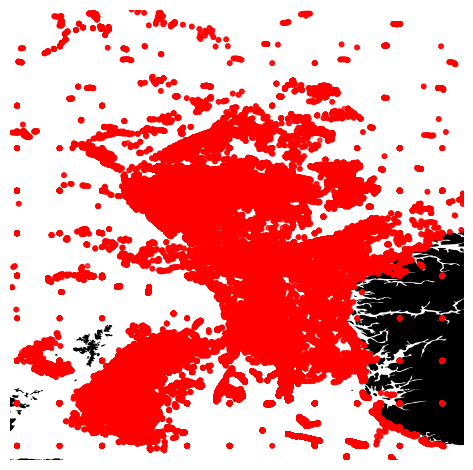

In [24]:
from plot_data import plot_all_catches
plot_all_catches(df_vms_show, test)

In [21]:
# find unique dates with catches given per year
df_vms_show['date'] = df_vms_show['Starttidspunkt'].dt.date
unique_dates = df_vms_show.groupby('year')['date'].nunique().reset_index()
print("Unique dates with catches per year:")
print(unique_dates)

Unique dates with catches per year:
    year  date
0   2011    66
1   2012    69
2   2013    72
3   2014    82
4   2015    88
5   2016    77
6   2017    83
7   2018    66
8   2019    51
9   2020    56
10  2021   112
11  2022   122
12  2023    98
13  2024   105


/tmp/ipykernel_1460371/347105699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vms_show['date'] = df_vms_show['Starttidspunkt'].dt.date


In [ ]:

# combine all VMS data and ERS data for one complete dataset

VMS_FOLDER = '/home/anna/msc_oppgave/fish-forecast/VMS-plots/OLD'
ERS_PATH = '/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_filtered.csv'
df_ers = pd.read_csv(ERS_PATH, sep=';')
df_ers['Source'] = 'ERS'
df_complete = df_ers.copy()
drop_columns_static = ['Meldingstype', 'Kurs','Fart', 'Radiokallesignal', 'Registreringsmerke', 
                       'Fartøynavn', 'Fartøytype']
drop_columns_dynamic = ['Melding ID', 'Meldingstype (kode)', 'Største lengde', 'Største lengde', 
                        'Motorkraft', 'Fartøyfylke', 'Fartøykommune', 'Bruttotonnasje 1969', 
                        'Bruttotonnasje annen', 'Fartøytype (kode)', 'Bruttotonnasje', 'MeldingID', 
                        'Meldingstype(kode)', 'Størstelengde']

vms_files = list(Path(VMS_FOLDER).glob(f"*.csv"))
for f in vms_files:
    df_vms = pd.read_csv(f, sep=';')
    df_vms.drop(columns=drop_columns_static, inplace=True)
    df_vms['Source'] = 'VMS'

    df_vms['Breddegrad'] = df_vms['Breddegrad'].astype(str).str.replace(',', '.').astype(float)
    df_vms['Lengdegrad'] = df_vms['Lengdegrad'].astype(str).str.replace(',', '.').astype(float)

    df_vms['Tidspunkt (UTC)'] = pd.to_datetime(df_vms['Tidspunkt (UTC)'], format='mixed')
    df_vms['Starttidspunkt'] = df_vms['Tidspunkt (UTC)'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df_vms['Date'] = df_vms['Tidspunkt (UTC)'].dt.strftime('%Y-%m-%d')
    df_vms['CatchLat'] = df_vms['Breddegrad']
    df_vms['CatchLon'] = df_vms['Lengdegrad']
    df_vms['Location'] = list(zip(df_vms['CatchLat'], df_vms['CatchLon']))
    df_vms.drop(columns=['Breddegrad', 'Lengdegrad', 'Tidspunkt (UTC)'], inplace=True)
    df_complete = pd.concat([df_complete, df_vms], ignore_index=True)

df_complete.drop(columns=drop_columns_dynamic, inplace=True)

df_complete['Timestamp'] = pd.to_datetime(df_complete['Starttidspunkt'], format='mixed')
df_complete.sort_values(by='Timestamp', inplace=True)
df_complete = df_complete.drop(columns=['Timestamp'])

df_complete.reset_index(drop=True, inplace=True)
df_complete.to_csv(f"ERS_VMS_test_area_filtered_{2011}_{2024}_jul_nov.csv", sep=';', index=False)

Speed distribution:
count    12158.000000
mean         0.398546
std          0.898776
min          0.000000
25%          0.000000
50%          0.299940
75%          0.552876
max         19.409417
Name: speed, dtype: float64


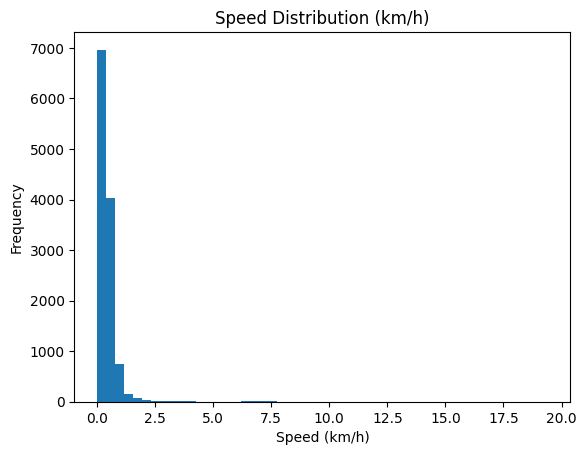

In [4]:

df_speed = df[df['distance_km'] < 1]
# drop rows with elapsed time of zero to avoid division by zero
df_speed = df_speed[df_speed['elapsed_time_hours'] > 0]

# plot the speed distribution
df_speed.speed.plot(kind='hist', bins=50, title='Speed Distribution (km/h)', xlabel='Speed (km/h)', ylabel='Frequency')
print("Speed distribution:")
print(df_speed['speed'].describe())

In [5]:
df_top_speed = df_speed[df_speed['speed'] > 20]
print("Top speed distribution:")
print(df_top_speed['speed'].describe())

Top speed distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: speed, dtype: float64


In [6]:
df_weight = pd.DataFrame({'Answer': [df[df['Rundvekt'] == 0].shape[0]]})
df_weight

,Answer
0,0
